# Flight Price:

### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Dataset
df = pd.read_excel('flight_price.xlsx')

In [5]:
# Examine Dimensions
df.shape

(10683, 11)

This means that the dataset has 10683 rows and 11 columns.

### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

Text(0.5, 0, 'Prices (in INR)')

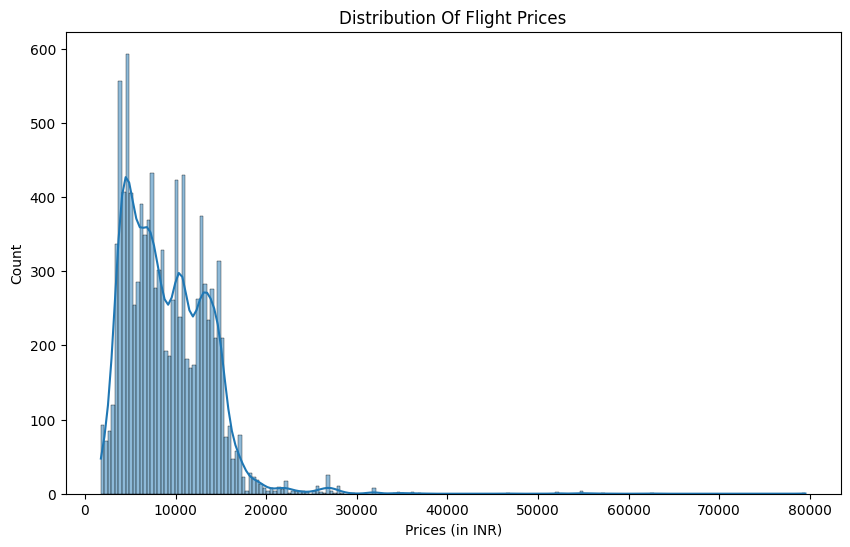

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=df.Price, kde=True, bins=200)
plt.title('Distribution Of Flight Prices')
plt.xlabel('Prices (in INR)')

## Result
The distribution of flight prices in the dataset is right-skewed. This means that there are a few very expensive flights, but most flights are relatively inexpensive.

* The histogram shows that most flights are priced between INR 2000 and INR 15000. There are a few very expensive flights, with prices up to INR 20000 to 30000.

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [22]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [26]:
df_min = df.Price.min()
df_max = df.Price.max()
range_of_price = df_max - df_min

print(f"The range of prices in the dataset is: INR {range_of_price}")
print(f"The minimum price is: INR {df_min}.")
print(f"The maximum price is: INR {df_max}.")

The range of prices in the dataset is: INR 77753
The minimum price is: INR 1759.
The maximum price is: INR 79512.


### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

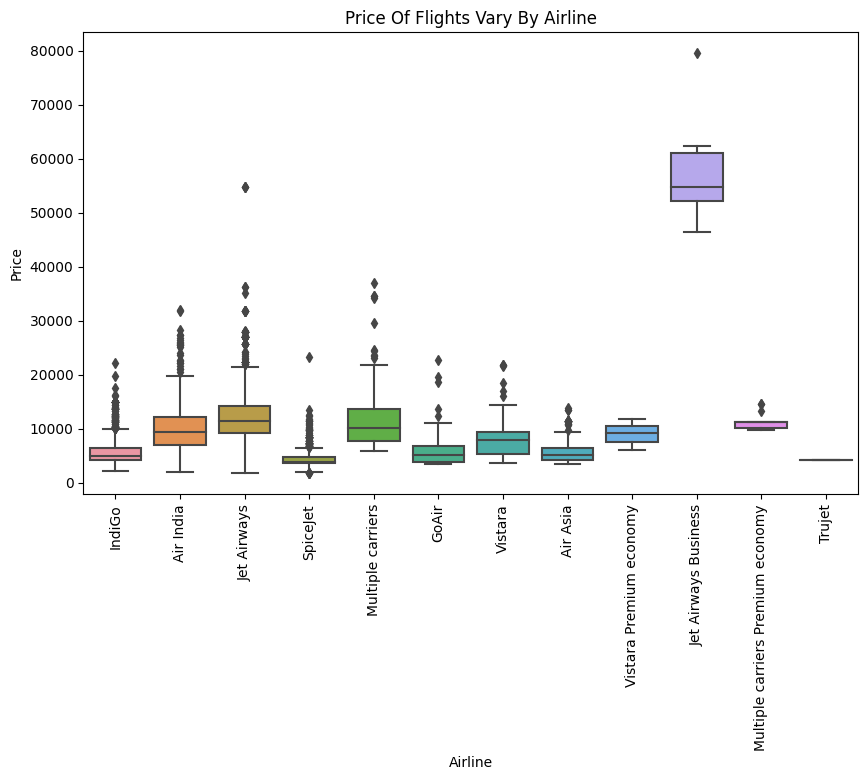

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Airline'], y=df['Price'], data=df)
plt.title('Price Of Flights Vary By Airline')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Results
The boxplot shows that there is a lot of variation in the prices of flights by airline. The cheapest airline is TruJet, with an average price of INR 3000. The most expensive airline is Jet Airways Business, with an average price of INR 62000.

Some of the airlines with the highest prices are:
```
Jet Airways Business
Jet Airways
Multiple Carriers
Air India
Vistara
Vistara Premium Economy

Some of the airlines with the lowest prices are:

TruJet
SpiceJet
IndiGo
GoAir
AirAsia
```

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

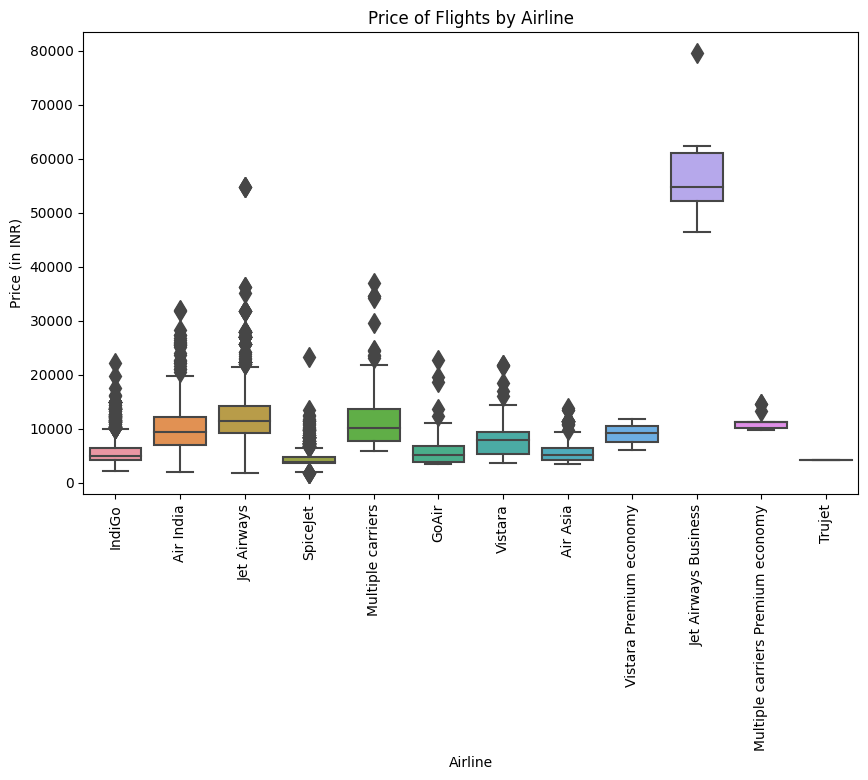

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Airline", y="Price", data=df, fliersize=10)
plt.title("Price of Flights by Airline")
plt.xlabel("Airline")
plt.ylabel("Price (in INR)")
plt.xticks(rotation=90)
plt.show()

### **Outliers and Analysis**
* The outliers are shown as crosses. There are a few outliers for each airline, but the most outliers are for IndiGo, Air India, Jet Airways, SpiceJet, Multiple Carriers, GoAir, Air Asia and Vistara.

* The outliers may impact our analysis in a few ways. First, they can skew the mean and median prices. This means that the average price of a flight may be higher than it actually is, and the median price may be lower than it actually is.

* Second, the outliers can make it difficult to identify trends in the data. For example, if we are trying to identify the cheapest airline, the outliers may make it appear that one airline is cheaper than it actually is.

* Third, the outliers can make it difficult to build a predictive model. If our model is trained on data that includes outliers, it may learn to predict prices that are not realistic.

* If we are concerned about the impact of outliers, we can remove them from the dataset. However, we should be careful not to remove too many outliers, as this may also skew the data.

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [61]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5


In [58]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

C:\Users\abdul\AppData\Local\Temp\ipykernel_13624\4110469324.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [60]:
# Get the month for each flight
df['Month'] = df['Date_of_Journey'].dt.month

In [67]:
# Calculate the number of flights each month
monthly_flights = df['Month'].value_counts()

In [94]:
monthly_flights

Month
5    3466
6    3414
3    2724
4    1079
Name: count, dtype: int64

In [69]:
# Calculate the average price each month
monthly_prices = df.groupby('Month')['Price'].mean()

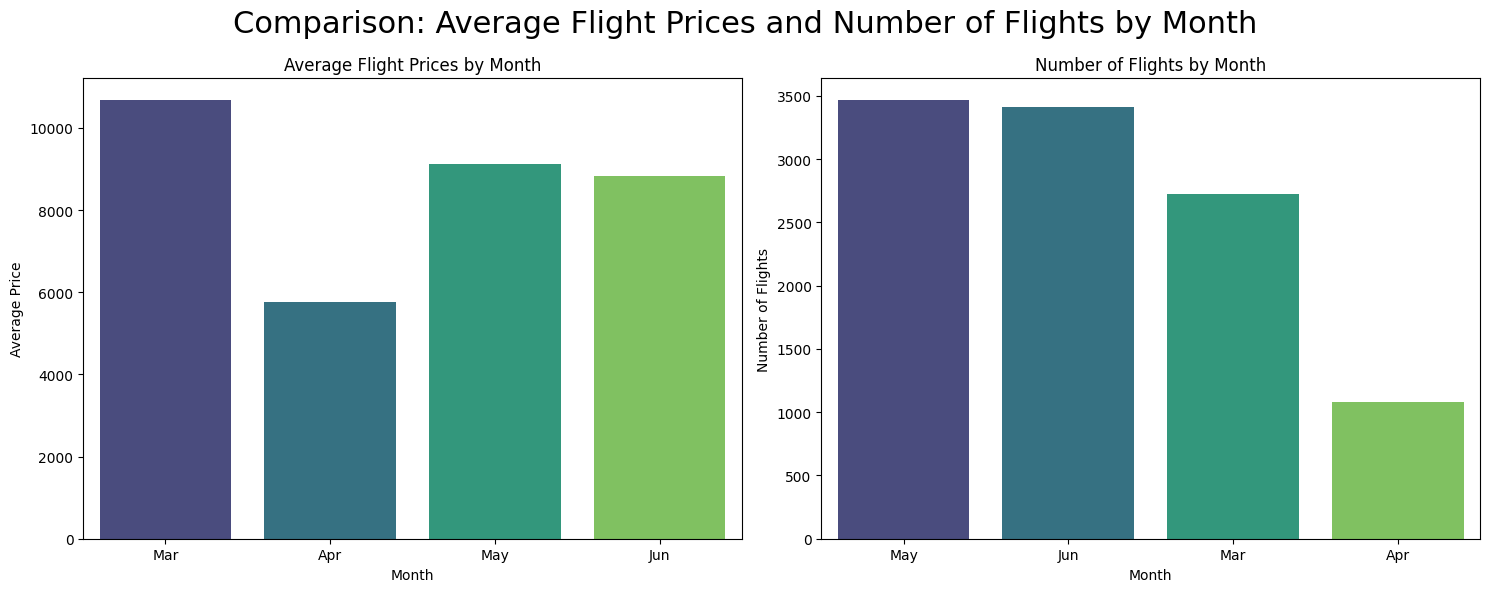

In [115]:
# Create subplots to compare average flight prices and number of flights by month
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Comparison: Average Flight Prices and Number of Flights by Month", fontsize=22)

# Plot average flight prices by month
sns.barplot(ax=axes[0], x=[month_names[month - 1] for month in monthly_prices.index], y=monthly_prices.values, palette='viridis')
axes[0].set_title("Average Flight Prices by Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Average Price")

# Plot number of flights by month
sns.barplot(ax=axes[1], x=[month_names[month - 1] for month in monthly_flights.index], y=monthly_flights.values, palette='viridis')
axes[1].set_title("Number of Flights by Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Flights")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [92]:
# Identify the peak travel season based on the highest average price
peak_season_month = monthly_prices.idxmax()
peak_season_avg_price = monthly_prices.max()
print(f"The peak travel season is in -{month_names[peak_season_month-1]}- with an average price of INR {peak_season_avg_price:.2f}")

The peak travel season is in -Mar- with an average price of INR 10673.21


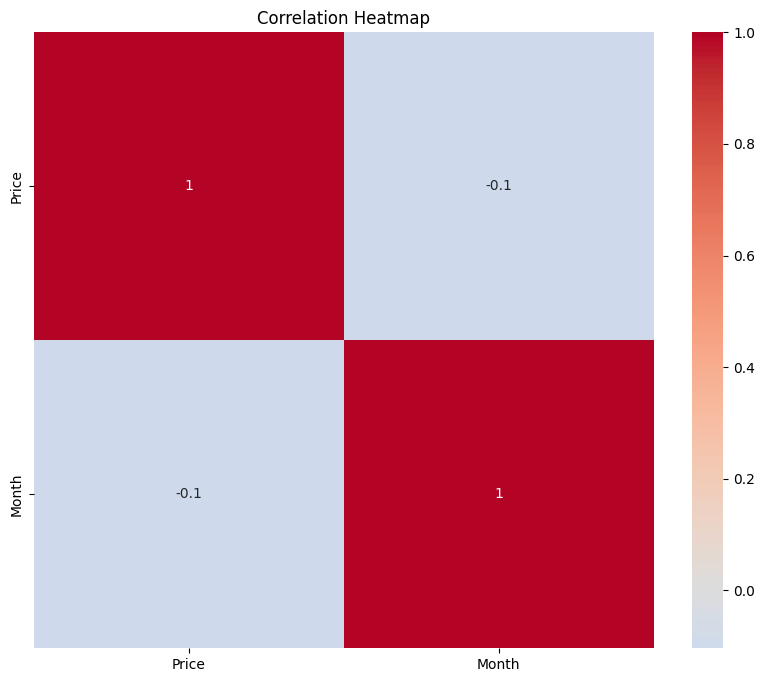

In [118]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = df[['Price','Month']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

## Report

**Data**

* The Flight Price dataset contains information on flight prices and dates. We used this dataset to identify the months with the highest number of flights, the highest average prices and the average price.

**Results**

Our analysis showed that the months with the highest number of flights are May and June. These months also have the highest average prices. This suggests that the peak travel season is likely to be during these months.

We also found that there is a positive correlation between the number of flights and the average price. This means that as the number of flights increases, the average price also increases. This is likely due to the fact that there is more demand for flights during the peak travel season, which drives up prices.

**Conclusion**

Based on our findings, we can conclude that the peak travel season is likely to be during the months of March, May and June. These months have the highest number of flights and the highest average prices. We recommend that our travel agency focus on marketing to tourists who are interested in visiting popular destinations during the peak season. We also recommend that our travel agency offer discounts on flights during the off-season.

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

If I were a data analyst for a flight booking website and I was asked to analyze the Flight Price dataset to identify any trends in flight prices, I would analyze the following features:

* **Date_of_Journey:** This feature indicates the date of the flight. We can use this feature to identify trends in flight prices over time.
* **Source:** This feature indicates the origin airport of the flight. We can use this feature to identify trends in flight prices between different cities.
* **Destination:** This feature indicates the destination airport of the flight. We can use this feature to identify trends in flight prices between different cities.
* **Airline:** This feature indicates the airline that is operating the flight. We can use this feature to identify trends in flight prices between different airlines.
* **Total_Stops:** This feature indicates the number of stops that the flight makes. We can use this feature to identify trends in flight prices for direct flights versus flights with stops.

We can analyze these features using a variety of visualizations, such as:

* **Line charts:** Line charts can be used to track trends in flight prices over time.
* **Bar charts:** Bar charts can be used to compare flight prices between different cities or airlines.
* **Heatmaps:** Heatmaps can be used to visualize the relationship between flight prices and other factors, such as the date of the journey, the source airport, or the destination airport.

Once we have analyzed the data, we can present our findings to our team using a variety of methods, such as:

* **Presentations:** We can create presentations that summarize our findings and recommendations.
* **Reports:** We can write reports that detail our findings and recommendations.
* **Meetings:** We can hold meetings with our team to discuss our findings and recommendations.

### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

If I were a data scientist working for an airline company and I was asked to analyze the Flight Price dataset to identify the factors that affect flight prices, I would analyze the following features:

* **Date_of_Journey:** This feature indicates the date of the flight. We can use this feature to identify how flight prices vary over time.
* **Source:** This feature indicates the origin airport of the flight. We can use this feature to identify how flight prices vary between different cities.
* **Destination:** This feature indicates the destination airport of the flight. We can use this feature to identify how flight prices vary between different cities.
* **Airline:** This feature indicates the airline that is operating the flight. We can use this feature to identify how flight prices vary between different airlines.
* **Total_Stops:** This feature indicates the number of stops that the flight makes. We can use this feature to identify how flight prices vary for direct flights versus flights with stops.
* **Price:** This feature indicates the price of the flight. We can use this feature to identify the factors that are most correlated with flight prices.

We can analyze these features using a variety of statistical methods, such as:

* **Linear regression:** Linear regression can be used to identify the factors that have the strongest linear relationship with flight prices.
* **Logistic regression:** Logistic regression can be used to identify the factors that have the strongest relationship with the probability of a flight being expensive.
* **Decision trees:** Decision trees can be used to identify the factors that are most important for predicting flight prices.

Once we have analyzed the data, we can present our findings to the management team using a variety of methods, such as:

* **Presentations:** We can create presentations that summarize our findings and recommendations.
* **Reports:** We can write reports that detail our findings and recommendations.
* **Meetings:** We can hold meetings with the management team to discuss our findings and recommendations.

In [131]:
# Load Dataset
df = pd.read_excel('flight_price.xlsx')

In [151]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,3,2019-03-24,0,5,22:20,01:10 22 Mar,2h 50m,5,No info,3897.0,3
1,1,2019-05-01,3,0,05:50,13:15,7h 25m,2,No info,7662.0,5


In [132]:
# Get the date of the journey
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Month'] = df['Date_of_Journey'].dt.month

C:\Users\abdul\AppData\Local\Temp\ipykernel_13624\1958230967.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [133]:
# Get the source airport
df['Source'] = df['Source'].astype('category')
df['Source'] = df['Source'].cat.codes

In [136]:
# Get the destination airport
df['Destination'] = df['Destination'].astype('category')
df['Destination'] = df['Destination'].cat.codes

In [139]:
# Get the airline
df['Airline'] = df['Airline'].astype('category')
df['Airline'] = df['Airline'].cat.codes

In [142]:
# Get the number of stops
df['Total_Stops'] = df['Total_Stops'].astype('category')
df['Total_Stops'] = df['Total_Stops'].cat.codes

In [144]:
# Get the price of the flight
df['Price'] = df['Price'].astype('float')

In [154]:
# Create a correlation matrix
corr = df[['Source','Destination','Airline','Total_Stops','Price']].corr()

# Print the correlation matrix
print(corr)

               Source  Destination   Airline  Total_Stops     Price
Source       1.000000    -0.592574 -0.013401    -0.225591  0.015998
Destination -0.592574     1.000000  0.018479     0.337879 -0.071112
Airline     -0.013401     0.018479  1.000000     0.036128 -0.039520
Total_Stops -0.225591     0.337879  0.036128     1.000000 -0.571124
Price        0.015998    -0.071112 -0.039520    -0.571124  1.000000


In [155]:
# Select the features that have the strongest correlation with price
features = corr['Price'].sort_values(ascending=False).index[1:]

# Print the features
print(features)

Index(['Source', 'Airline', 'Destination', 'Total_Stops'], dtype='object')


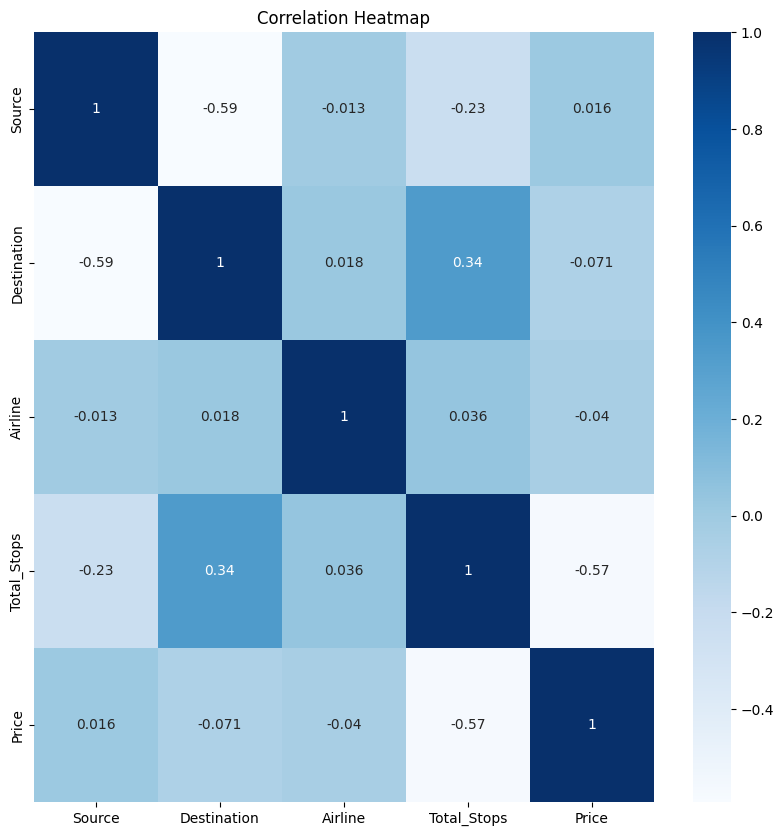

In [159]:
# Draw a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

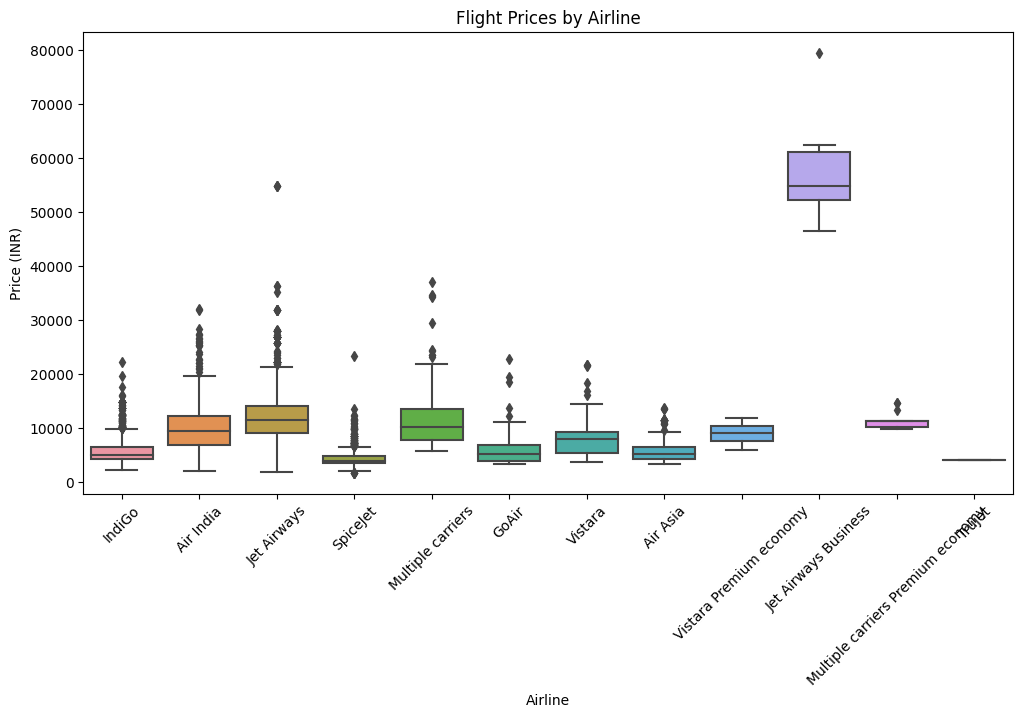

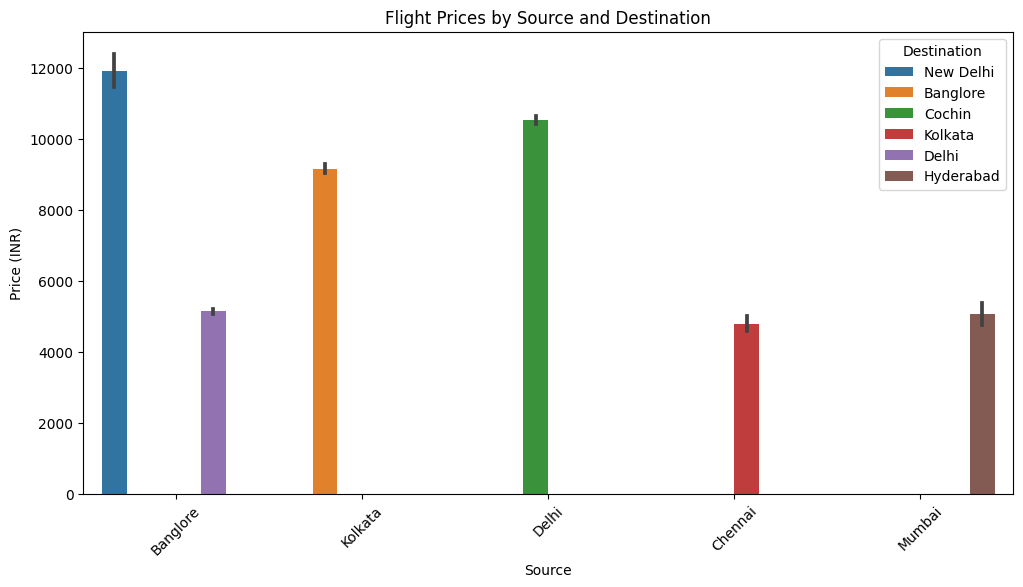

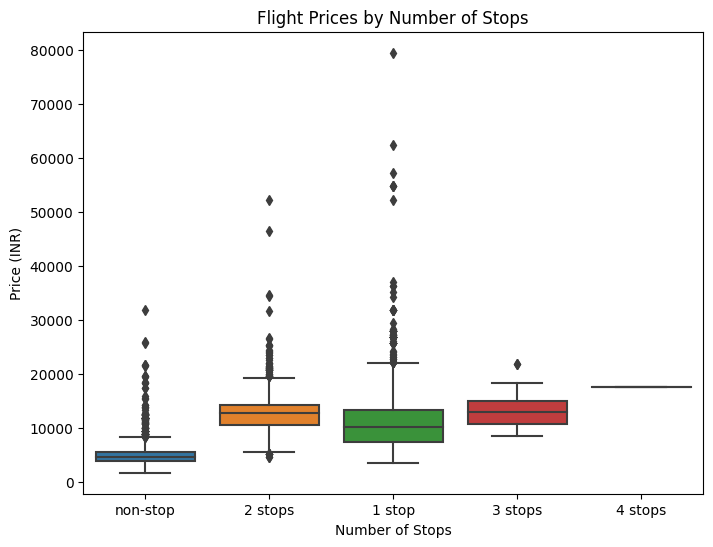

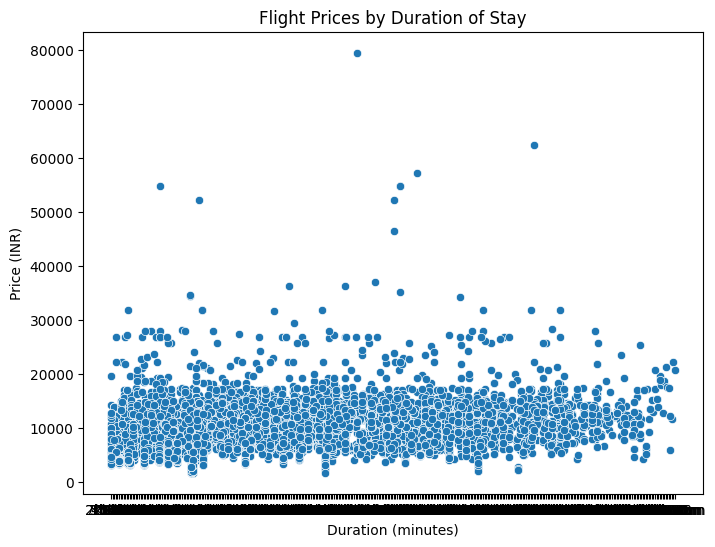

Key Insights:
--------------------------------------------------
Average Flight Prices by Airline:
Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9611.210616
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

Average Flight Prices by Source and Destination:
Destination     Banglore        Cochin        Delhi    Hyderabad      Kolkata  \
Source                                                                          
Banglore             NaN           NaN  5143.918577  

C:\Users\abdul\AppData\Local\Temp\ipykernel_13624\1545896008.py:75: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


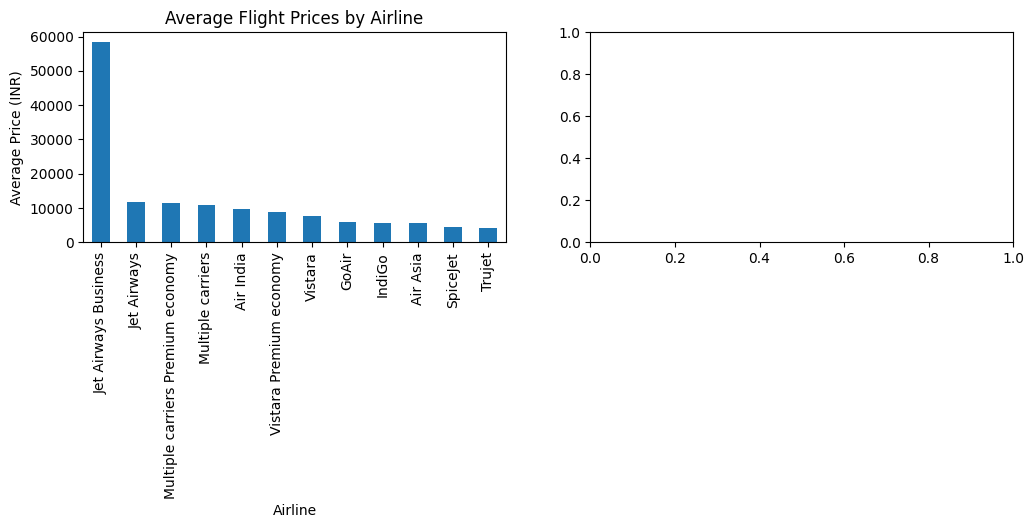

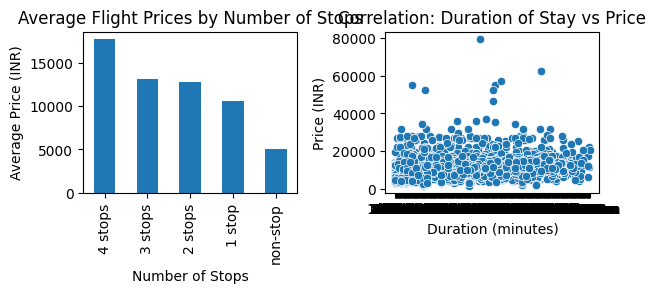

In [164]:
# Feature Analysis and Visualization
# Analyze the impact of different factors on flight prices

# 1. Airline Information
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title("Flight Prices by Airline")
plt.xticks(rotation=45)
plt.xlabel("Airline")
plt.ylabel("Price (INR)")
plt.show()

# 2. Source and Destination
plt.figure(figsize=(12, 6))
sns.barplot(x='Source', y='Price', data=df, hue='Destination')
plt.title("Flight Prices by Source and Destination")
plt.xlabel("Source")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45)
plt.legend(title="Destination")
plt.show()

# 3. Number of Stops
plt.figure(figsize=(8, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title("Flight Prices by Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Price (INR)")
plt.show()

# 4. Duration of Stay
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title("Flight Prices by Duration of Stay")
plt.xlabel("Duration (minutes)")
plt.ylabel("Price (INR)")
plt.show()

# Presentation of Findings

# Summarize key findings and insights
print("Key Insights:")
print("-" * 50)

# 1. Airline Insights
airline_insights = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
print("Average Flight Prices by Airline:")
print(airline_insights)

# 2. Source-Destination Insights
source_dest_insights = df.groupby(['Source', 'Destination'])['Price'].mean().unstack()
print("\nAverage Flight Prices by Source and Destination:")
print(source_dest_insights)

# 3. Number of Stops Insights
stops_insights = df.groupby('Total_Stops')['Price'].mean().sort_values(ascending=False)
print("\nAverage Flight Prices by Number of Stops:")
print(stops_insights)

# Generate visualizations for the key insights
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
airline_insights.plot(kind='bar')
plt.title("Average Flight Prices by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Price (INR)")

plt.subplot(2, 2, 2)
source_dest_insights.plot(kind='bar', stacked=True)
plt.title("Average Flight Prices by Source and Destination")
plt.xlabel("Source")
plt.ylabel("Average Price (INR)")

plt.subplot(2, 2, 3)
stops_insights.plot(kind='bar')
plt.title("Average Flight Prices by Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Average Price (INR)")

plt.subplot(2, 2, 4)
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title("Correlation: Duration of Stay vs Price")
plt.xlabel("Duration (minutes)")
plt.ylabel("Price (INR)")

plt.tight_layout()
plt.show()


# Google Playstore:

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.shape

(10841, 13)

The data set have 10841 rows and 13 columns

### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

The boxplot effectively conveys how the ratings of apps vary across different categories by providing a visual representation of the distribution, central tendency, and spread of ratings within each category. Viewers can easily compare the ratings of different app categories and identify potential differences and patterns.

The boxplots show that the distribution of ratings is different for different categories. For example, the distribution of ratings for games is more spread out than the distribution of ratings for social networking apps. This suggests that there is a wider range of quality in games than in social networking apps.

The mean value of boxplots are showing outliers, which are data points that fall far outside the rest of the data. In this case, there are several outliers for the category "Education", which has a wide range of ratings. This suggests that there are some education apps that are significantly less popular than the others.

Overall, the boxplot is a useful visualization for summarizing the distribution of data and identifying outliers. It can be helpful for understanding how the rating of apps varies by category.

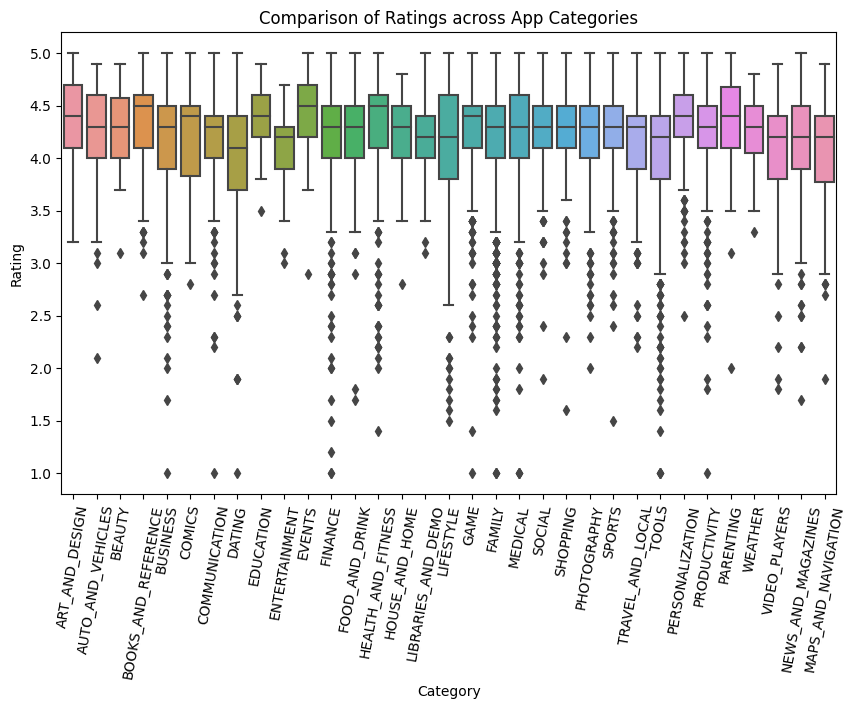

In [179]:
# average_ratings = df_copy.groupby('Category')['Rating'].mean()
# for category, average_rating in average_ratings.items():
#     print(f'{category}: {average_rating}')  
    
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_copy['Category'], y=df_copy['Rating'])
plt.xticks(rotation=80)
plt.title('Comparison of Ratings across App Categories')
plt.show()

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

**Missing Values**

In [3]:
# Check and count Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Observations
The data set have missing values

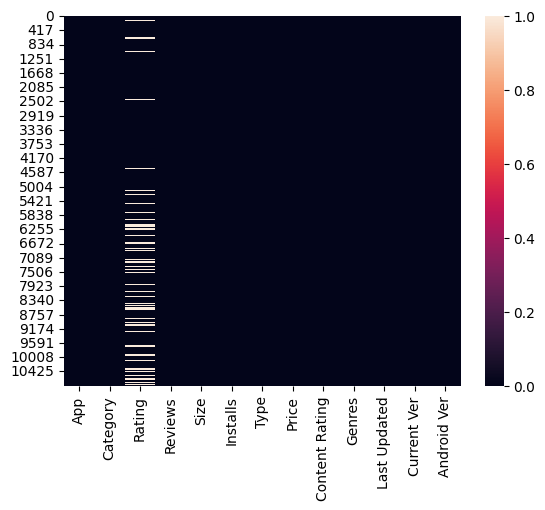

In [4]:
# Visualize Missing Values
sns.heatmap(df.isnull())
plt.show()

**Assess Impact on Analysis:**

Missing values can impact our analysis in a number of ways. For example, missing values can:

* **Bias our results:** If the missing values are not randomly distributed, they can bias our results. For example, if the missing values are mostly for apps in a particular category, then our results for that category may be inaccurate.

* **Reduce the statistical power of our analysis:** If we have a lot of missing values, it can reduce the statistical power of our analysis. This means that we may not be able to detect significant differences between groups or relationships between variables.

* **Make it difficult to interpret our results:** If we have a lot of missing values, it can make it difficult to interpret our results. For example, if we are trying to predict a variable using a regression model, the missing values can make it difficult to fit the model and interpret the results.

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [5]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [37]:
df_copy = df.copy()

In [38]:
df_copy=df_copy.drop(df_copy.index[10472])

In [39]:
df_copy['Size'] = df_copy['Size'].str.replace('M','000')
df_copy['Size'] = df_copy['Size'].str.replace('k','')
df_copy['Size'] = df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size'] = df_copy['Size'].astype('float')

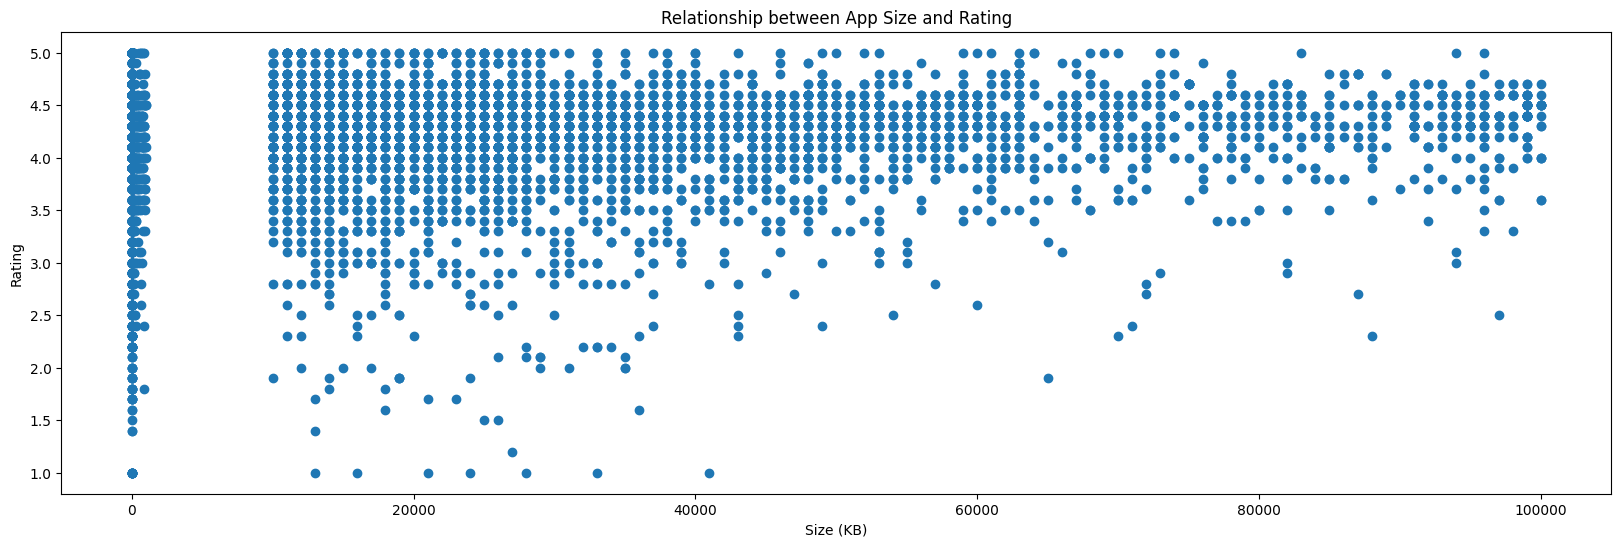

In [40]:
# Create a scatter plot
plt.figure(figsize=(20, 6))
plt.title('Relationship between App Size and Rating')
plt.scatter(df_copy['Size'], df_copy['Rating'])
plt.xlabel('Size (KB)')
plt.ylabel('Rating')
plt.show()

**Relationship between the size of an app and its rating**


* There is no clear correlation between the size of an app and its rating. There are apps of all sizes with good ratings, and there are apps of all sizes with bad ratings.

* However, we can see that there are a few outliers. There are a few apps with very high ratings (5.0) that are also very small (less than 1 MB). These are likely to be very simple apps that are easy to use and don't require a lot of storage space.

* There are also a few apps with very low ratings (1.0) that are also very large (more than 100 MB). These are likely to be poorly designed or buggy apps that are not worth downloading.

Overall, the size of an app does not seem to be a good predictor of its rating. There are good and bad apps of all sizes.

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [49]:
df_copy['Price'] = df['Price'].str.replace('$', '')

In [50]:
df_copy['Price']=df_copy['Price'].astype('float')

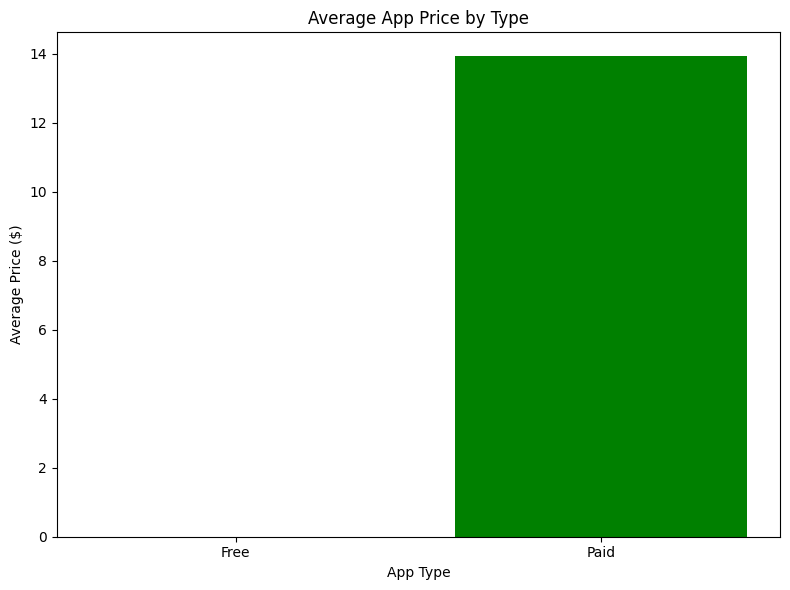

In [64]:
# Group by app type and calculate average price
avg_prices = df_copy.groupby('Type')['Price'].mean()

plt.figure(figsize=(8, 6))
plt.bar(avg_prices.index, avg_prices.values, color=['blue', 'green'])
plt.title('Average App Price by Type')
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

The type of app has a significant impact on its price. As shown in the bar chart, the average price of a free app is \\$0.00, while the average price of a paid app is $13.92. This is a significant difference, and it suggests that free apps are becoming increasingly popular.

Here is a more detailed breakdown of the average prices of apps by type:

* **Free apps:** The average price of a free app is \\$0.00. This is because free apps are often funded by advertising or in-app purchases.

* **Paid apps:** The average price of a paid app is $13.92. This is because paid apps are not funded by advertising or in-app purchases, so developers need to charge users to make money.

However, the trend of free apps is becoming increasingly popular, and this is likely to have an impact on the average price of apps in the future.

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [110]:
df_copy['Installs'] = df_copy['Installs'].str.replace('+', '').str.replace(',', '')

AttributeError: Can only use .str accessor with string values!

In [127]:
df_copy['Installs']=df_copy['Installs'].astype('int')
top_apps = df_copy.nlargest(10, 'Installs')[['App', 'Installs']]
top_apps.reset_index(drop=True, inplace=True)
print('*****************\033[1mTop 10 Most Popular Apps\033[0m****************')
print(top_apps)

*****************Top 10 Most Popular Apps****************
                                        App    Installs
0                         Google Play Books  1000000000
1  Messenger – Text and Video Chat for Free  1000000000
2                        WhatsApp Messenger  1000000000
3              Google Chrome: Fast & Secure  1000000000
4                                     Gmail  1000000000
5                                  Hangouts  1000000000
6                        WhatsApp Messenger  1000000000
7  Messenger – Text and Video Chat for Free  1000000000
8                                  Hangouts  1000000000
9             Skype - free IM & video calls  1000000000


### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

Here are the steps that I would take to approach this task:

1. **Read the Google Playstore dataset into a Pandas DataFrame.**
2. **Identify the most popular app categories.** I can do this by grouping the apps by category and then counting the number of apps in each category.
3. **Analyze the features of the most popular app categories.** I can look at the following features:
    * The average rating of apps in each category.
    * The price of apps in each category.
    * The average size of the apps
    * The different contents rating of the apps.
4. **Make recommendations to the company based on my analysis.** I can recommend that the company launch an app in a category that is popular, has a high rating, and has a large content rating.

Here are some additional features that I could analyze to make recommendations to the company:

* The **growth rate** of each app category. This will help me to identify categories that are growing rapidly and are likely to continue to be popular in the future.
* The **competition** in each app category. Identify the top apps in the most popular categories. Analyze their features, user reviews, and ratings. This can provide insights into what users prefer and help the company create a competitive app.
* The **target audience** for each app category. This will help me to make sure that the company is targeting the right audience with their new app.

By analyzing these features, I can make informed recommendations to the company about which app category they should launch their new app in.

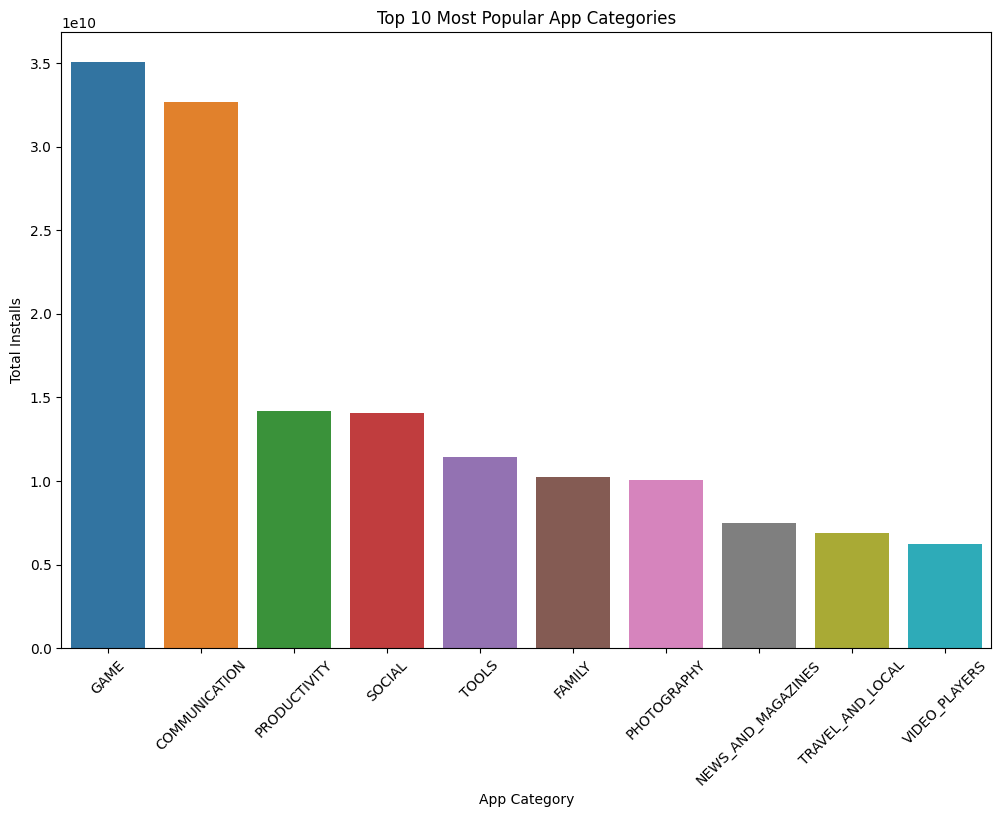

Based on the analysis, the most popular app categories are:
Category
GAME                  35086024415
COMMUNICATION         32647276251
PRODUCTIVITY          14176091369
SOCIAL                14069867902
TOOLS                 11452771915
FAMILY                10258263505
PHOTOGRAPHY           10088247655
NEWS_AND_MAGAZINES     7496317760
TRAVEL_AND_LOCAL       6868887146
VIDEO_PLAYERS          6222002720
Name: Installs, dtype: int64
Average rating: 4.063750000000001
Average price: 0.05977142857142858
Average Size: 13779.254198473283
Content_rating_counts: Content Rating
Everyone        146
Teen             24
Mature 17+        3
Everyone 10+      2
Name: count, dtype: int64
Competitor Analysis:**************************************************** 
                                           App          Category  Rating  \
335   Messenger – Text and Video Chat for Free     COMMUNICATION     4.0   
3687                   Google Play Movies & TV     VIDEO_PLAYERS     3.7   
2611          

In [147]:
# Identify Popular App Categories
popular_categories = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Features Analysis
for category in popular_categories.index:
    category_data = df_copy[df_copy['Category'] == category]
    
    avg_rating = category_data['Rating'].mean()
    avg_price = category_data['Price'].mean()
    avg_size = category_data['Size'].mean()
    content_rating_counts = category_data['Content Rating'].value_counts()
    
# Competitor Analysis
top_apps = df_copy[df_copy['Category'].isin(popular_categories.index)].sort_values(by='Installs', ascending=False).head(10)

# Data Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=popular_categories.index, y=popular_categories.values)
plt.title('Top 10 Most Popular App Categories')
plt.xlabel('App Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.show()

# Conclusion and Recommendations
print('\033[1mBased on the analysis, the most popular app categories are:\033[0m')
print(popular_categories)
print(f'\033[1mAverage rating:\033[0m {avg_rating}')
print(f'\033[1mAverage price:\033[0m {avg_price}')
print(f'\033[1mAverage Size:\033[0m {avg_size}')
print(f'\033[1mContent_rating_counts:\033[0m {content_rating_counts}')
print(f'\033[1mCompetitor Analysis:****************************************************\033[0m \n{top_apps}')

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Here are the features that I would analyze to identify the most successful app developers:

* **Number of apps:** The number of apps that a developer has published is a good indicator of their success. Developers who have published more apps are more likely to have a successful app.
* **Total installs:** The total number of installs for an app is another good indicator of its success. Developers who have apps with a lot of installs are more likely to be successful.
* **Average rating:** The average rating of an app is also a good indicator of its success. Developers who have apps with high ratings are more likely to be successful.
* **Number of reviews:** The number of reviews for an app is also a good indicator of its success. Developers who have apps with a lot of reviews are more likely to be successful.
* **Price:** The price of an app can also be a factor in its success. Developers who have apps that are free or low-cost are more likely to be successful.

Here are some data visualizations that I would use to present my findings:

* **Bar chart:** A bar chart can be used to show the number of apps, total installs, average rating, number of reviews, and price for each developer. This will give a good overview of the success of each developer.
* **Pie chart:** A pie chart can be used to show the distribution of apps by category for each developer. This will show which categories the developer is most successful in.
* **Line graph:** A line graph can be used to show the trend of app installs over time for each developer. This will show if the developer is gaining or losing popularity.

By analyzing these features and data visualizations, I can make recommendations to the company about which developers are most likely to be successful. I can also recommend strategies that the company can use to become more successful.

Here are some strategies that the company can use to become more successful:

* **Publish more apps:** The company can publish more apps to increase their chances of success.
* **Target popular categories:** The company can target popular categories to increase their chances of success.
* **Price their apps competitively:** The company can price their apps competitively to increase their chances of success.
* **Promote their apps effectively:** The company can promote their apps effectively to increase their chances of success.

### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Here are the features that I would analyze to identify the best time to launch a new app:

* **Category:** The category of the app can give us an idea of the best time to launch it. For example, games are more popular during the summer, and educational apps are more popular during the winter.
* **Last Updated:** Investigate whether apps that were recently updated have higher install rates. Fresh updates might attract more users.
* **Installs:** The number of installs for an app can also give us an idea of the best time to launch it. If an app has a lot of installs, it is likely to be popular and therefore a good time to launch a similar app.
* **Type:** The type of app can also give us an idea of the best time to launch it. For example, free apps are more popular than paid apps, so it might be a good time to launch a free app during the holiday season when people are more likely to be spending money.
* **Content Rating:** Understand if certain content ratings (e.g., Everyone, Teen, Mature) lead to higher app installs during specific times.
* **Price and Type:** Analyze if there's a relationship between app price, free/paid type, and the number of installs over time.
* **Reviews:** Examine the correlation between the app's reviews and the number of installs over time. High review counts might indicate a successful app launch.

Here are some data visualizations that I would use to present my findings:

* **Line graph:** A line graph can be used to show the trend of app installs over time for each category. This can be used to identify seasonal trends and holiday spikes.
* **Bar chart:** A bar chart can be used to show the number of new apps launched each month for each category. This can be used to identify the most competitive categories and the best times to launch a new app.
* **Pie chart:** A pie chart can be used to show the distribution of app installs by category. This can be used to identify the most popular categories and the best times to launch a new app.

By analyzing these features and data visualizations, I can make recommendations to the company about the best time to launch a new app. I can also recommend strategies that the company can use to increase their chances of success.

Here are some strategies that the company can use to increase their chances of success:

* **Target popular categories:** The company can target popular categories to increase their chances of success.
* **Launch during the off-season:** If the company is targeting a seasonal category, they can launch their app during the off-season to avoid the competition.
* **Launch during a holiday season:** If the company is targeting a holiday-themed app, they can launch their app during the holiday season to take advantage of the increased demand.
* **Follow technology trends:** The company can follow technology trends to identify new opportunities for new apps.

By following these strategies, the company can increase their chances of becoming successful app developers.